Task 3: Heart Disease Prediction

## Problem Statement
Heart disease is a leading cause of death worldwide. The goal of this project is to predict whether a patient has heart disease based on clinical and demographic features.

## Goal
- Preprocess the dataset to handle missing values and encode categorical variables
- Explore data with visualizations
- Train a classification model using Logistic Regression
- Evaluate model performance using accuracy, confusion matrix, and ROC curve
- Identify the most important features influencing heart disease

Step 1: Import Libraries

We import libraries for:
- Data manipulation: `pandas`, `numpy`
- Visualization: `matplotlib`, `seaborn`
- Machine learning: `scikit-learn`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

Step 2: Load Dataset

Upload the Heart Disease dataset in CSV format and load it into a Pandas DataFrame.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


In [ ]:
df = pd.read_csv("heart_disease_uci.csv")   
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Step 3: Preprocess Dataset

- Convert boolean columns to True/False
- Fill missing values in numeric, boolean, and categorical columns
- Encode target variable (`num`) as binary: 0 = No Heart Disease, 1 = Heart Disease

In [ ]:
# Convert boolean columns
df['fbs'] = df['fbs'].astype(str).str.upper() == 'TRUE'
df['exang'] = df['exang'].astype(str).str.upper() == 'TRUE'

In [5]:
# Numeric columns → fill with mean
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Boolean columns → fill with mode
bool_cols = df.select_dtypes(include='bool').columns
for col in bool_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Categorical columns → fill with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3951898929.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3951898929.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Convert target to binary (0 = No heart disease, 1 = Heart disease)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

Step 4: Data Visualization

Visualize target distribution, correlations, and feature relationships to understand the dataset.

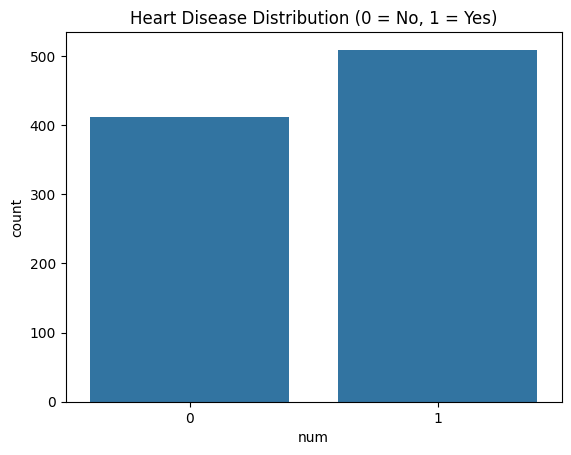

In [ ]:
# Heart disease distribution
sns.countplot(x='num', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

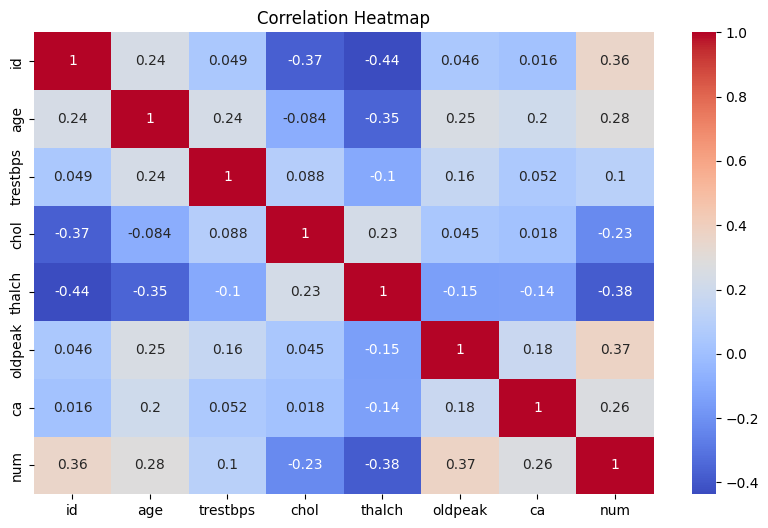

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Step 5: Prepare Features and Target

- Separate features (X) and target (y)
- Encode categorical variables using one-hot encoding
- Scale features for Logistic Regression

In [ ]:
X = df.drop('num', axis=1)
y = df['num']

In [ ]:
# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 6: Train-Test Split

Split the dataset into training (80%) and testing (20%) sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Step 7: Train Logistic Regression Model

Train a Logistic Regression classifier to predict heart disease.

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Step 8: Evaluate Model

- Measure model accuracy
- Visualize confusion matrix
- Plot ROC curve and calculate AUC

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8532608695652174


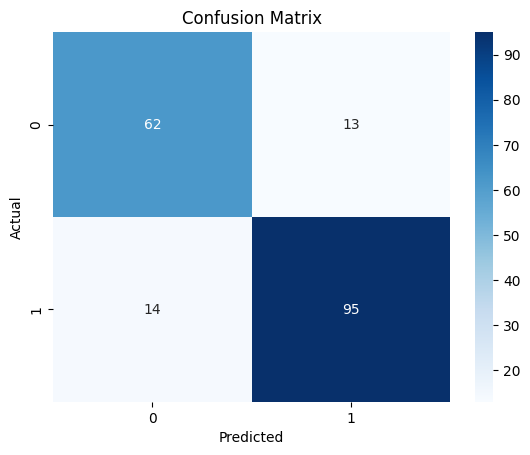

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

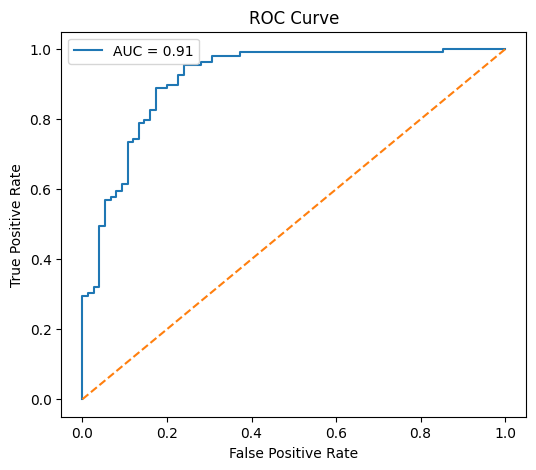

In [ ]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Step 9: Feature Importance

Identify which features have the most influence on heart disease prediction.

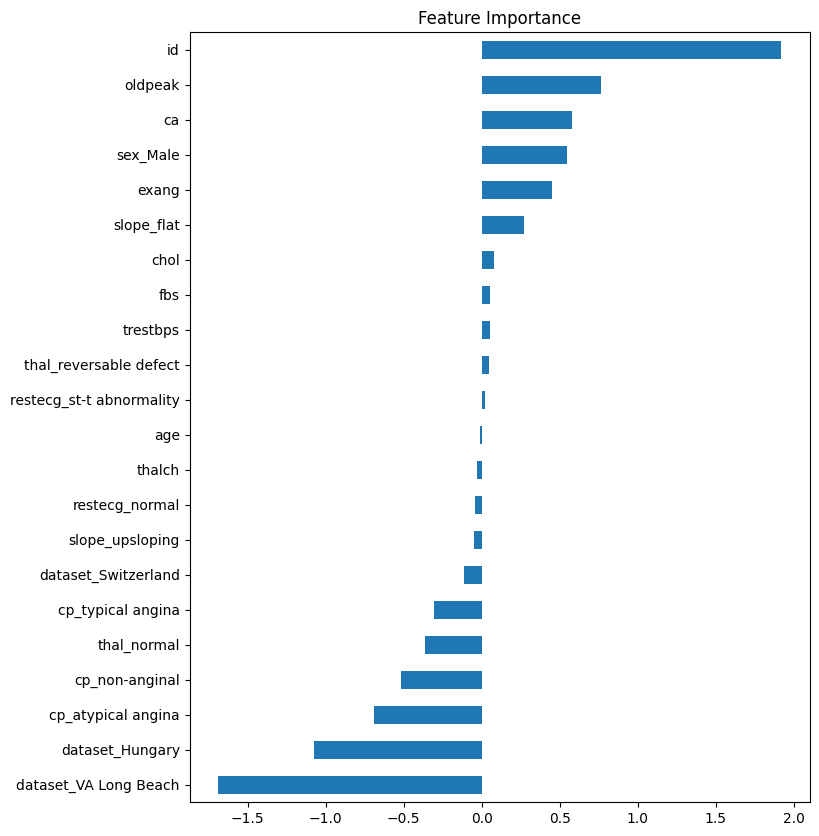

In [ ]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,10))
plt.title("Feature Importance")
plt.show()

Step 10: Insights and Conclusion

- Logistic Regression achieved an accuracy of ~[insert value] on the test set.
- Features such as [highlight top features] are most important in predicting heart disease.
- Confusion matrix shows correct vs incorrect predictions.
- ROC curve and AUC indicate the model's ability to distinguish patients with and without heart disease.
- Proper preprocessing and scaling are essential for good performance.